# Machine Learning: Auscultando las Redes Neuronales con Python
*Segunda semana*\
Tomado del **modulo 3** de las notas de Diego Luis Aristizábal R,\
Quantum computing UNAL, Universidad Nacional de Colombia.\
Sergio Quiroga Sandoval

## Módulo 3

Se da una mirada sobre la manipulación de los datos para que una red
neuronal los consuma adecuadamente. Se comienza mostrando cómo auscultar el dataset:
número de examples, tipo de datos, **forma tensorial** de los mismos, etc. Se continúa ilustrando
cómo se pueden organizar los datos en forma de tabla para una mejor comprensión de cómo
darles estructura. Luego se discute sobre el preprocesamiento de éstos: **vectorización** y
**normalización**. Se finaliza con ejemplos sobre cómo usar la librería matplotlib para
visualizacón de datos.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### MNIST DATASET
60 000 imágenes para entrenamiento
y 10 000 imágenes para el testeo.\
Por las dimensiones del dataset usado en éste ejemplo y del procesamiento que hay que
realizar con éste el cual se dificulta con una CPU1
 se recurrirá a la GPU2
 (también podría ser la
TPU3
) de Google Colab.

Primero hay que escoger el entorno de ejecución. (GPU)


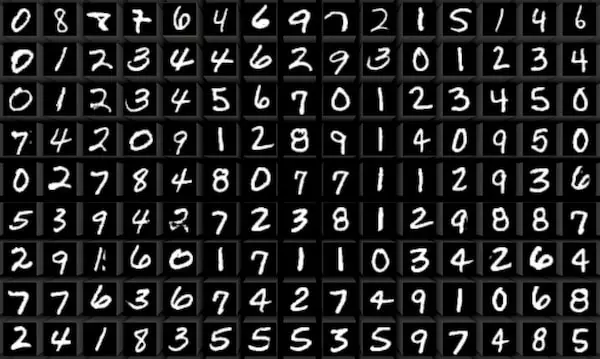

imagen tomada de https://datasets.activeloop.ai/docs/ml/datasets/mnist/

In [2]:
mnist = tf.keras.datasets.mnist
(imagenes_entrenamiento, etiquetas_entrenamiento), (imagenes_testeo, etiquetas_testeo) = mnist.load_data()
print("Cantidad de imágenes de Entrenamiento",len(imagenes_entrenamiento))
print("Cantidad de etiquetas de Entrenamiento",len(etiquetas_entrenamiento))
print("Cantidad de imágenes de Testeo",len(imagenes_testeo))
print("Cantidad de etiquetas de Testeo",len(etiquetas_testeo))

11490434/11490434 [==============================] - 0s 0us/step
Cantidad de imágenes de Entrenamiento 60000
Cantidad de etiquetas de Entrenamiento 60000
Cantidad de imágenes de Testeo 10000
Cantidad de etiquetas de Testeo 10000


Cada imagen es de 28x28 pixeles (784 pixeles), cada pixel es un numero entre 0 y 255, la etiqueta ***y***
 informa el número al que corresponde la imagen (0,1,2,3,4,5,6,7,8,9)

In [4]:
# Auscultando el dataset
# tipos de dato, formas, tamaño, dimensión de los arreglos
# que contienen las imagenes.

# EJERCICIO: Piense la dimensión de cada tensor y luego rectifique.

X_train = imagenes_entrenamiento
y_train = etiquetas_entrenamiento
X_test = imagenes_testeo
y_test = etiquetas_testeo

print("Auscultando las imágenes de entrenamiento, X_train")
print("Tipo de dato de X_train:", X_train.dtype)
print("Shape (forma) de X_train:",X_train.shape)
print("Tamaño de X_train:",X_train.size)
print("Dimensión de X_train:", X_train.ndim)
print("\n")
print("Auscultando las etiquetas de entrenamiento, y_train")
print("Tipo de dato de y_train:", y_train.dtype)
print("Shape (forma) de y_train:", y_train.shape)
print("Tamaño de y_train", y_train.size)
# print("Dimensión de y_train:", y_train.ndim)
print("\n")
print("Auscultando las imágenes de testeo, X_test")
print("Tipo de dato de X_test:", X_test.dtype)
print("Shape (forma) de X_test:", X_test.shape)
print("Tamaño de X_test:",X_test.size)
# print("Dimensión de X_test:", X_test.ndim)
print("\n")
print("Auscultando las etiquetas de testeo, y_test")
print("Tipo de dato de y_test:", y_test.dtype)
print("Shape (forma) de y_test:", y_test.shape)
print("Tamaño de y_test:", y_test.size)
print("Dimensión de y_test:", y_test.ndim)
print("\n")


Auscultando las imágenes de entrenamiento, X_train
Tipo de dato de X_train: uint8
Shape (forma) de X_train: (60000, 28, 28)
Tamaño de X_train: 47040000
Dimensión de X_train: 3


Auscultando las etiquetas de entrenamiento, y_train
Tipo de dato de y_train: uint8
Shape (forma) de y_train: (60000,)
Tamaño de y_train 60000


Auscultando las imágenes de testeo, X_test
Tipo de dato de X_test: uint8
Shape (forma) de X_test: (10000, 28, 28)
Tamaño de X_test: 7840000


Auscultando las etiquetas de testeo, y_test
Tipo de dato de y_test: uint8
Shape (forma) de y_test: (10000,)
Tamaño de y_test: 10000
Dimensión de y_test: 1




uint8: enteros en formato 8 bit,

X_train y X_test son tensores de dimensión 3.

El numero de atributos o características de entrada de cada ejemplo es de $28 \times 28 = 784$ y hay 60000 ejemplos en entrenamiento, es decir que el tamaño de ese tensor será $28 \times 28 \times 60000 = 47040000 $

(más adelante veremos que en redes convolucionales se adjudica una neurona para cada entrada)

Auscultando imagen X_1220 de entrenamiento
Forma de X_1230 (28, 28)
Tamaño de X_1230 784
Dimensión de X_1230 2


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  34   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  73 249 101   0   0   0  21  54   2   0   0   0   0   0]
 [  0   0  26 204 254 231   0   0   0 184 254   5   0   0   0   0   0]
 [  0   0  90 254 254 189   0   0   0 214 254   5   0   0   0   0   0]
 [  0   0  11 229 254 113   0   0   0 214 254   5   0   0   0   0   0]
 [  0   0  86 253 254 110   0   0   0 211 254 177   0   0   0   0   0]
 [  0   0 101 254 249   0   0   0   0  96 254 243   0   0   0   0   0]
 [  0  12 216 254 154   0   0   0   0  96 254 243   0   0   0   0   0]
 [  0 100 254 254  11   0   0   0  

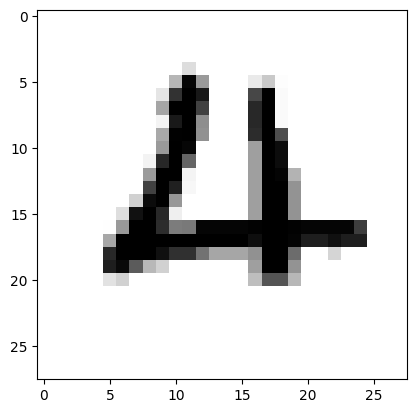

In [5]:
X_1220 = X_train[1220]
y_1220 = y_train[1220]
print("Auscultando imagen X_1220 de entrenamiento")
print("Forma de X_1230", X_1220.shape)
print("Tamaño de X_1230", X_1220.size)
print("Dimensión de X_1230",X_1220.ndim)
print("\n")

# imprimir el array numpy de un pedazo
# de la imagen de entrenamiento 1220

print(str(X_1220[0:25,7:24]))
print("\n")
print("Auscultando etiqueta y_1220 de entrenamiento")
print("Forma de y_1220", y_1220.shape)
print("Tamaño de y_1220", y_1220.size)
print("Dimensión de y_1220",y_1220.ndim)
print("y_1220:", y_1220)
print("\n")
print("Imagen de entrenamiento x_1220\n")
plt.imshow(X_1220, cmap = plt.cm.binary)            # cmap es el mapa de colores, e.g. binary, gray


Ahora vamos a crear un gráfico de varias imagenes del dataset

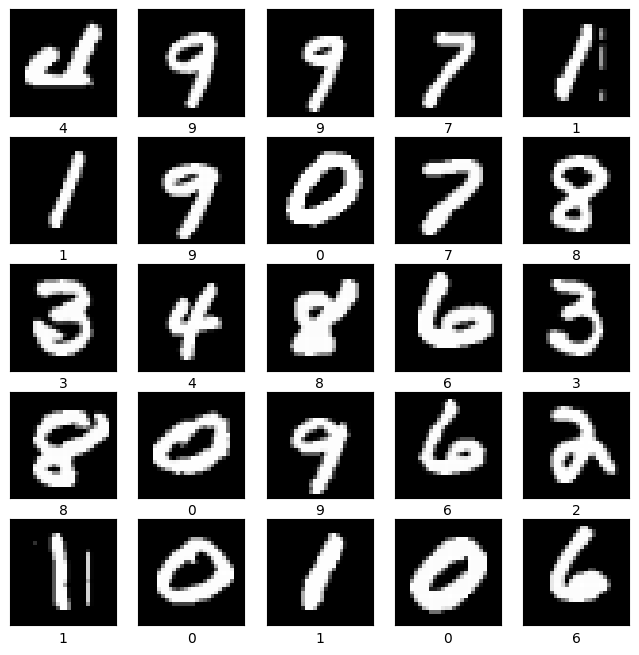

In [10]:
#Desplegar un conjunto de imágenes de testeo
# Se crea una figura con sub-graficás organizadas en 5x5 .

fig_1, axes_1 = plt.subplots(5,5, figsize=(8, 8))
ax = axes_1.ravel()


# Ticks son los valores usados para mostrar puntos específicos en el eje correspondiente.
for i in range(0,25):
 ax[i].set_xticks([])     # desactiva ticks eje x
 ax[i].set_yticks([])     # desactiva ticks eje y
 #<poner las etiqetas a las imágenes
 ax[i].set_xlabel(y_test[8000 + i])
 #despliega las imágenes de testeo desde la 8 000 hasta la 8 025
 ax[i].imshow(imagenes_testeo[8000+i], cmap = plt.cm.gray )
plt.show()

El ejemplo tratado tiene como objetivo dar una idea de lo “complejo” que pueden alcanzar
las formas tensoriales de un dataset dependiendo de la aplicación. \

Pensar en que las imágenes
anteriores no fueran de un solo canal (gris) sino de tres canales RGB (Red, Green, Blue) o cuatro RGBA (Red, Green, Blue, Alfa) en donde Alfa es transparencia. O el análisis de un video
o el de una Tomografía Axial Computarizada.\
 Se llega a la conclusión que se pueden obtener
estructuras tan complejas como se quiera con base a la aplicación y la forma de diseñar e
implementar su solución.

A partir de aquí se puede seguir trabajando con la CPU

### Tensores

In [12]:
# EJERCICIO: Piense la dimensión de cada tensor y luego rectifique.
#app_3.1
import numpy as np

# ej 1
x = np.array(56)
print("Tensor de rango 0: ESCALAR")
print("Dimensión de x: ",x.ndim)
print ("Forma (shape) de x: ", x.shape)
print("\n")

# ej 2

x = np.array([56, 183, 1])
print("Tensor de rango 1: VECTOR")
# print("Dimensión de x: ",x.ndim)
print ("Forma (shape) de x: ", x.shape)
print("\n")

#ej 3

x = np.array([[56, 183, 1],
 [20, 71, 18],
 [0, 43, 12]])
print("Tensor de rango 2: ,ATRIZ")
# print("Dimensión de x: ",x.ndim)
print ("Forma (shape) de x: ", x.shape)
print("\n")

# ej 4

x = np.array([[[56, 183, 1], [20, 71, 18]],
 [[21, 3, 1], [10, 7, 5]],
 [[56, 103, 1], [20, 11, 18]]])
print("Tensor de rango 3: TENSOR")
# print("Dimensión de x: ",x.ndim)
print ("Forma (shape) de x: ", x.shape)

Tensor de rango 0: ESCALAR
Dimensión de x:  0
Forma (shape) de x:  ()


Tensor de rango 1: VECTOR
Forma (shape) de x:  (3,)


Tensor de rango 2: ,ATRIZ
Forma (shape) de x:  (3, 3)


Tensor de rango 3: TENSOR
Forma (shape) de x:  (3, 2, 3)


### Preprocesamiento de datos
Etapa fundamental en el diseño e implementación de modelos de machine learning.
Los datos pueden tener ruido, valores atípicos, valores nulos y otras anomalías que disminuyen el rendimiento del modelo.\
Este proceso incluye:
- Vectorización.
- Tratamiento de valores nuos de características.
- Normalización de características.
- Codificación de variables categóricas.
- Gestión de valores anómalos.



### Normalización

In [ ]:
#app_3.2
import numpy as np
from sklearn.datasets import load_iris
"""
importar el dataset
"""
#DATASET

dataset = load_iris()
features = dataset.data
etiquetas = dataset.target

#PREPARACIÓN DEL DATASET PARA EL APRENDIZAJE
#MATRIZ X
"""
Recoger las features en un arreglo X
de dimensión nxm: n examples, m features.
"""
X = np.array(features)
"""
Recoger las etiquetas en un arreglo y1
de dimensión 1xn: n examples.
En este ejemplo el dataset proporcionó las
etiquetas en formato de numérico
"""
y = np.array(etiquetas)
#Desplegar X sin normalizar datos
print("X sin normalizar datos:\n",X)
print("\n")
#NORMALIZAR LA MATRIZ X
def normalizarX(X):
 X = (X-np.amin(X))/(np.amax(X)-np.amin(X))                 # np.amin retorna el mínimo del array
 return X
X = normalizarX(X)
print("X con datos normalizados:\n",X)
print("\n")
#Deplegar y
print("Etiquetas con valor numérico asignado:\n",y)


X sin normalizar datos:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 

### Codificación de variables categóricas
**One Hot Encoding**

Crear una columna binaria (que
solo puede contener los valores 0 o 1) para cada valor único que exista en la variable categórica
que se está codificando, y marcar con un 1 la columna correspondiente al valor presente en cada
registro, dejando las demás columnas con un valor de 0


### Dataset Iris

Iris-Setosa,
Iris-Versicolor,
Iris-Virginica

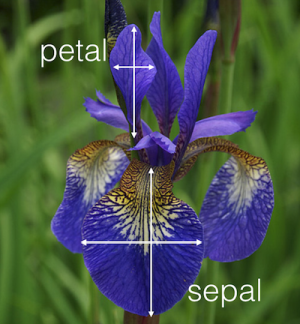

Imagen tomada de:
https://www.ritchieng.com/machine-learning-iris-dataset/

In [ ]:
#app_3.3
import numpy as np
def one_hot(a):
 a_one_hot = np.zeros((a.size, a.max() + 1))
 a_one_hot[np.arange(a.size), a] = 1

 return a_one_hot
#Ejemplo 1: Etiquetas del ejemplo MNIST
y_1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
#Ejemplo 2
y_2 = np.array([2, 3, 5])
#Ejemplo 3
y_3 = ["rojo", "verde", "azul", "amarillo"]
#Primero se les debe asignar etiqueta numerica
#por ejemplo "rojo" 1, "verde" 2, "azul" 3, "amarillo" 4
y_3 = np.array([1,2,3,4])
print(one_hot(y_1))
print("\n")
print(one_hot(y_2))
print("\n")
print(one_hot(y_3))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Codificación One Hot para etiquetas del dataset Iris

In [ ]:
#app_3.4
import numpy as np
from sklearn.datasets import load_iris
"""
importar el dataset
"""
#DATASET
dataset = load_iris()
features = dataset.data
etiquetas = dataset.target
#PREPARACIÓN DEL DATASET PARA EL APRENDIZAJE
#MATRIZ X
"""
Recoger las features en un arreglo X
de dimensión nxm: n examples, m features.
"""
X = np.array(features)
"""
Recoger las etiquetas en un arreglo y1
de dimensión 1xn: n examples.
En este ejemplo el dataset proporcionó las
etiquetas en formato de numérico
"""
y = np.array(etiquetas)
#Deplegar y sin codificación One Hot
print("Etiquetas con valor numérico asignado:\n",y)
print("\n")
#NORMALIZAR LA MATRIZ X
def normalizarX(X):
 X = (X-np.amin(X))/(np.amax(X)-np.amin(X))
 return X
X = normalizarX(X)
#MATRIZ y TIPO ONE-HOT
"""
Codifificación tipo One-Hot de las etiquetas Y
Y = digits.target
Y = one_hot(Y)
ETIQUETAS NUMÉRICAS QUE SE USAN EN ESTE EJEMPLO
Iris-Setosa [1 0 0]
Iris-Versicolor [0 1 0]
Iris-Virginica [0 0 1]
"""
def one_hot(y):
 y_one_hot = np.zeros((y.size, y.max() + 1))
 y_one_hot[np.arange(y.size), y] = 1

 return y_one_hot
Y = one_hot(y)
print("Etiquetas con codificación One-Hot:\n", Y)


Etiquetas con valor numérico asignado:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Etiquetas con codificación One-Hot:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0

### Visualización
Usando Matplotlib

### Scatter

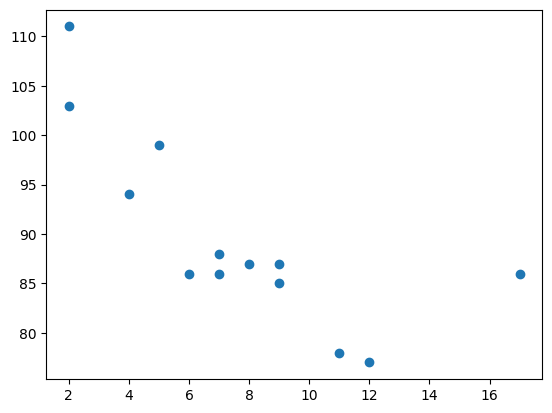

In [ ]:
# La función scatter() dibuja un diagrama de dispersión

#app_3.5_a
import matplotlib.pyplot as plt
import numpy as np
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y)
plt.show()

Ahora, si tenemos dos clases de datos se crean dos parcelas:

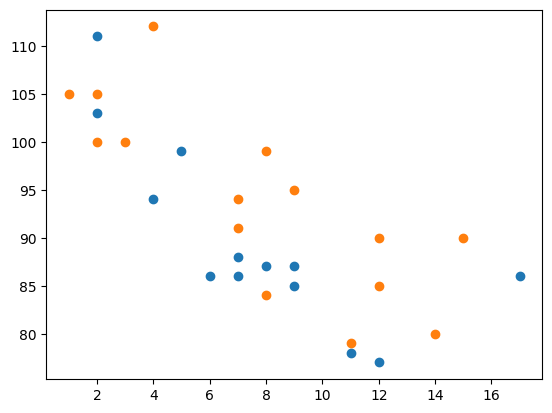

In [ ]:
#app_3.5_b
import matplotlib.pyplot as plt
import numpy as np
#datos 1
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y)
#datos 2
x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y)
plt.show()

Si queremos un color en específico para cada clase :

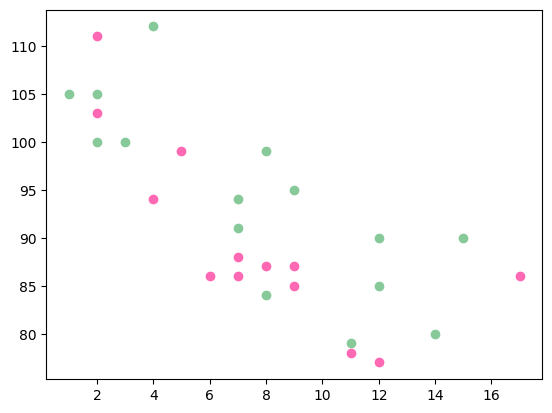

In [ ]:
#app_3.5_c
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y, color = 'hotpink')

x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y, color = '#88c999')

plt.show()

Si queremos establecer un color específico para cada punto.\
Usando una matriz de colores como valor para
el argumento c.

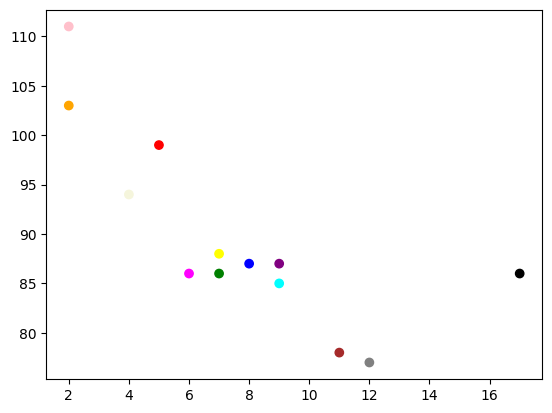

In [ ]:
#app_3.5_d
import matplotlib.pyplot as plt
import numpy as np
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
plt.scatter(x, y, c=colors)
plt.show()

Matplotlib tiene varios mapas de colores disponibles. Un mapa de colores es
como una lista de colores, donde cada color tiene un valor que oscila entre 0 y 100.\
'viridis' va desde 0, que es un color
morado, hasta 100, que es un color amarillo. \



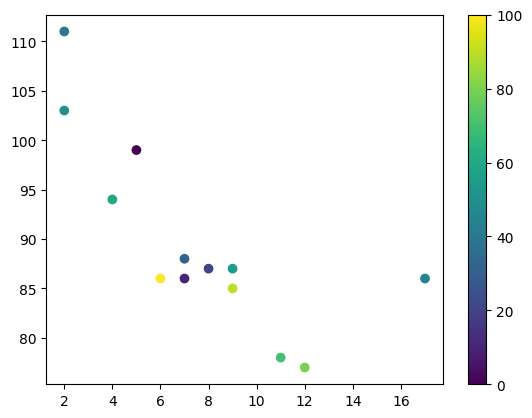

In [ ]:
#app_3.5_e
import matplotlib.pyplot as plt
import numpy as np
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100])
plt.scatter(x, y, c=colors, cmap='viridis')

plt.colorbar()  # para incluir el mapa de colores en el dibujo

plt.show()

Puede combinarse un mapa de colores con diferentes tamaños de puntos. Esto se visualiza mejor si los puntos son transparentes.

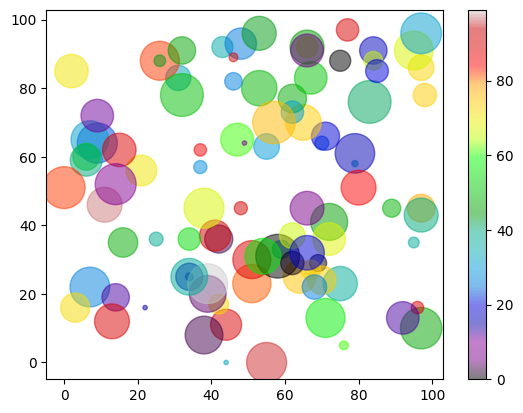

In [ ]:
#app_3.5_g
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randint(100, size=(100))
y = np.random.randint(100, size=(100))
colors = np.random.randint(100, size=(100))
sizes = 10 * np.random.randint(100, size=(100))
plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='nipy_spectral')
plt.colorbar()
plt.show()

### Plot
Graficar con plot

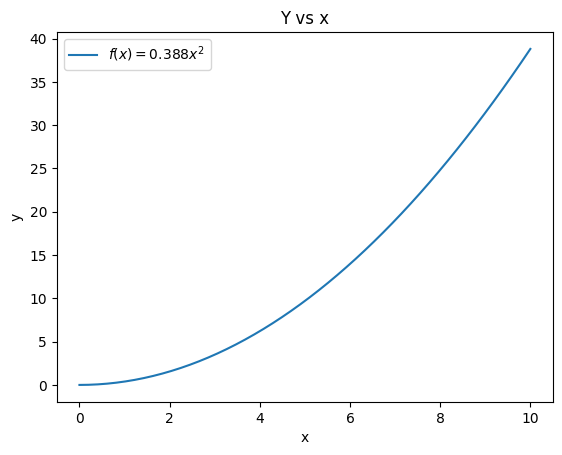

In [ ]:
#app_3.5_h
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 50)
y = 0.388 * x**2
plt.plot(x, y, label='$f(x) = 0.388 x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Y vs x')
plt.legend()
plt.show()

Múltiples gráficos:

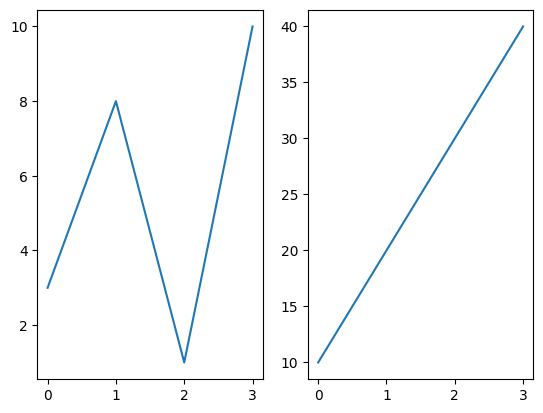

In [ ]:
#app_3.5_i
import matplotlib.pyplot as plt
import numpy as np
#plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])
plt.subplot(1, 2, 1)
plt.plot(x,y)
#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])
plt.subplot(1, 2, 2)
plt.plot(x,y)
plt.show()

### Ejemplo con el dataset Iris

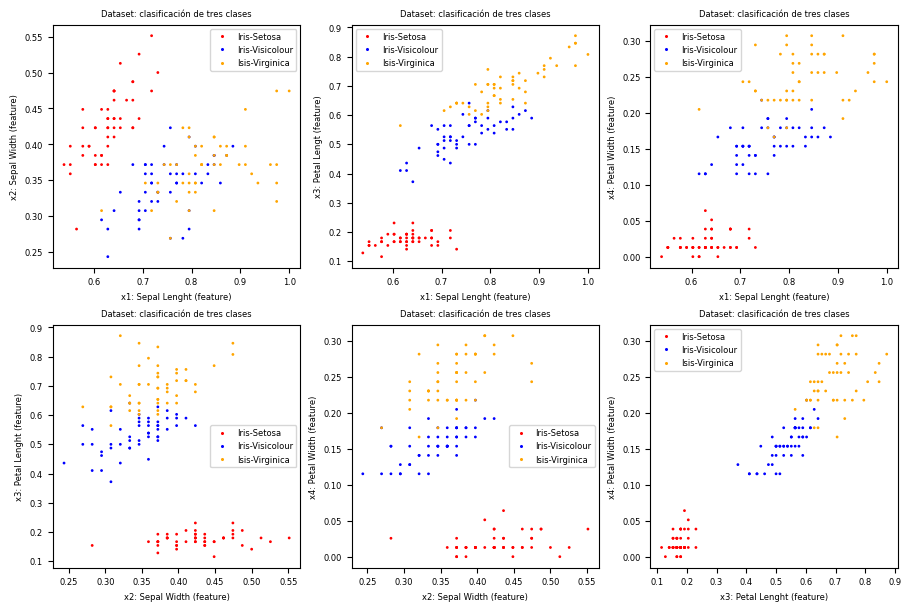

In [ ]:
#ejemplo 3_6
import numpy as np
#import pandas as pd
#paquete para desplegar plot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
"""
importar el dataset
"""
#DATASET
dataset = load_iris()#pd.read_csv('Iris.csv')
features = dataset.data
etiquetas = dataset.target
#PREPARACIÓN DEL DATASET PARA EL APRENDIZAJE
#MATRIZ X
"""
Recoger las features en un arreglo X
de dimensión nxm: n examples, m features.
"""
X = np.array(features)
"""
Recoger las etiquetas en un arreglo y1
de dimensión 1xn: n examples.
En este ejemplo el dataset proporcionó las
etiquetas en formato de numérico
"""
y = np.array(etiquetas)
#PREPARACIÓN DEL DATASET PARA EL APRENDIZAJE

#MATRIZ X
"""
Recoger las features en un arreglo X
de dimensión nxm: n examples, m features
"""
#NORMALIZAR LA MATRIZ X
X = np.array(features)
def normalizarX(X):
  X =(X-np.amin(X))/(np.amax(X)-np.amin(X))
  return X
X = normalizarX(X)
#MATRIZ y
"""
Recoger las etiquetas en un arreglo y1
de dimensión 1xn: n examples.
En este ejemplo el dataset proporcionó las
etiquetas en formato de string
"""
y = np.array(etiquetas)

#MATRIZ y TIPO ONE-HOT
"""
Codifificación tipo One-Hot de las etiquetas Y
Y = digits.target
Y = one_hot(Y)
ETIQUETAS NUMÉRICAS QUE SE USAN EN ESTE EJEMPLO
Iris-Setosa [1 0 0]
Iris-Versicolor [0 1 0]
Iris-Virginica [0 0 1]
28
"""
def one_hot(y):
 y_one_hot = np.zeros((y.size, y.max() + 1))
 y_one_hot[np.arange(y.size), y] = 1

 return y_one_hot
Y = one_hot(y)
"""
GRAFICAR
"""
def visualizar(X,Y):

 #graficar los datos
 fig, axes = plt.subplots(2, 3,figsize=(9, 6),constrained_layout = True)
 ax = axes.ravel()
 tamano = 6
 clases = ['Iris-Setosa', 'Iris-Visicolour', 'Isis-Virginica']
 colores = ListedColormap(['red', 'blue', 'orange'])
 """
 Aplanar Y en vector columna con valores que identifiquen
 las clases: Aquí se optón por valors 0, 1 y 2
 [1 0 0] pasa a [0]
 [0 1 0] pasa a [1]
 [0 0 1] pasa a [2]
 """
 Y_aplanado = np.argmax(Y,axis=1)
 #x2 vs x1
 scatter = ax[0].scatter(X[:,0], X[:,1], c = Y_aplanado, cmap=colores, s=1)
 ax[0].set_xlabel('x1: Sepal Lenght (feature)', fontsize=tamano)
 ax[0].set_ylabel('x2: Sepal Width (feature)', fontsize=tamano)
 ax[0].set_title("Dataset: clasificación de tres clases", fontsize=tamano)
 #tamaño de las etiquetas de los ejes
 ax[0].xaxis.set_tick_params(labelsize=tamano)
 ax[0].yaxis.set_tick_params(labelsize=tamano)
 ax[0].legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=tamano,
markerscale=0.2)
 #x3 vs x1
 scatter = ax[1].scatter(X[:,0], X[:,2],c=Y_aplanado, cmap=colores, s=1)
 ax[1].set_xlabel('x1: Sepal Lenght (feature)', fontsize=tamano)
 ax[1].set_ylabel('x3: Petal Lengt (feature)', fontsize=tamano)
 ax[1].set_title("Dataset: clasificación de tres clases", fontsize=tamano)
 #tamaño de las etiquetas de los ejes
 ax[1].xaxis.set_tick_params(labelsize=tamano)
 ax[1].yaxis.set_tick_params(labelsize=tamano)
 ax[1].legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=6,
markerscale=0.2)
 #x4 vs x1
 scatter = ax[2].scatter(X[:,0], X[:,3],c=Y_aplanado, cmap=colores, s=1)
 ax[2].set_xlabel('x1: Sepal Lenght (feature)', fontsize=tamano)
 ax[2].set_ylabel('x4: Petal Width (feature)', fontsize=tamano)
 ax[2].set_title("Dataset: clasificación de tres clases", fontsize=tamano)
 #tamaño de las etiquetas de los ejes
 ax[2].xaxis.set_tick_params(labelsize=tamano)
 ax[2].yaxis.set_tick_params(labelsize=tamano)
 ax[2].legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=6,
markerscale=0.2)
#x3 vs x2
 scatter = ax[3].scatter(X[:,1], X[:,2],c=Y_aplanado, cmap=colores, s=1)
 ax[3].set_xlabel('x2: Sepal Width (feature)', fontsize=tamano)
 ax[3].set_ylabel('x3: Petal Lenght (feature)', fontsize=tamano)
 ax[3].set_title("Dataset: clasificación de tres clases", fontsize=tamano)
 #tamaño de las etiquetas de los ejes
 ax[3].xaxis.set_tick_params(labelsize=tamano)
 ax[3].yaxis.set_tick_params(labelsize=tamano)
 ax[3].legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=6,
markerscale=0.2)
 #x4 vs x2
 scatter = ax[4].scatter(X[:,1], X[:,3],c=Y_aplanado, cmap=colores, s=1)
 ax[4].set_xlabel('x2: Sepal Width (feature)', fontsize=tamano)
 ax[4].set_ylabel('x4: Petal Width (feature)', fontsize=tamano)
 ax[4].set_title("Dataset: clasificación de tres clases", fontsize=tamano)
 #tamaño de las etiquetas de los ejes
 ax[4].xaxis.set_tick_params(labelsize=tamano)
 ax[4].yaxis.set_tick_params(labelsize=tamano)
 ax[4].legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=6,
markerscale=0.2)
 #x4 vs x3
 scatter = ax[5].scatter(X[:,2], X[:,3],c=Y_aplanado, cmap=colores, s=1)
 ax[5].set_xlabel('x3: Petal Lenght (feature)', fontsize=tamano)
 ax[5].set_ylabel('x4: Petal Width (feature)', fontsize=tamano)
 ax[5].set_title("Dataset: clasificación de tres clases", fontsize=tamano)
 #tamaño de las etiquetas de los ejes
 ax[5].xaxis.set_tick_params(labelsize=tamano)
 ax[5].yaxis.set_tick_params(labelsize=tamano)
 ax[5].legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=6,
markerscale=0.2)
 plt.show()

visualizar(X,Y)

## Módulo 4



*   Funciones de activación.
*   Función de perdida.
*   Hiperparámetros.
*   Inicialización de pesos y Bias





**Funciones de activación**\
Permiten quitarle la
linealidad a las redes para que aprendan procesos más complejos.\
permiten un acotamiento de los datos de salida.

**Funciones de pérdida**\
En combinación con las de activación de la última capa permiten
mediante los algoritmos de retropropagación (**backpropagation**) y de **descenso del gradiente**,
minmizar el error, guiando un adecuado ajuste de los pesos y del BIAS, permitiendo que la red lleve a cabo predicciones con alta eficiencia.

Hay varios tipos de funciones de activación usadas en el aprendizaje profundo y
dependiendo de cuál es el problema para resolver o el tipo de red usada, se empleará una u otra
función de activación. Incluso en muchas redes neuronales se usan varios tipos de funciones
de activación a la vez (en diferentes capas).

In [3]:
#app_4.1
import matplotlib.pyplot as plt
import numpy as np
def identidad(z):

 return z
def d_identidad(z):

 return 1

#visualizar

def visualizar(y1,y2,z):
 plt.plot(z, y1, label='$Identidad$', linewidth = 0.5)
 plt.plot(z, y2, label='$Derivada$', linestyle = "--", linewidth = 0.8)
 plt.xlabel('z')
 plt.ylabel('y')
 plt.title('y vs z')
 plt.legend()
 plt.show()
z = np.linspace(-5, 5, 50)
#para convertir en arreglos
y1 = np.zeros(len(z))
y2 = np.zeros(len(z))
y1 = identidad(z)
y2[:] = d_identidad(z)


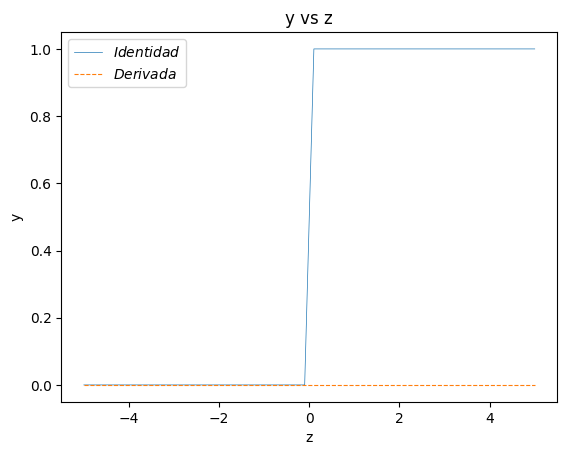

In [4]:

#app_4.2
import matplotlib.pyplot as plt
import numpy as np
def binaryStep(z):

 return np.heaviside(z,1)
def d_binaryStep(z):

 return 0

 #visualizar

def visualizar(y1,y2,z):

 plt.plot(z, y1, label='$Identidad$', linewidth = 0.5)
 plt.plot(z, y2, label='$Derivada$', linestyle = "--", linewidth = 0.8)
 plt.xlabel('z')
 plt.ylabel('y')
 plt.title('y vs z')
 plt.legend()
 plt.show()
z = np.linspace(-5, 5, 50)


#para convertir en arreglos
#app_4.1
import matplotlib.pyplot as plt
import numpy as np
def identidad(z):

 return z
def d_identidad(z):

 return 1
y1 = np.zeros(len(z))
y2 = np.zeros(len(z))
y1 = binaryStep(z)
y2[:] = d_binaryStep(z)
visualizar(y1,y2,z)

In [1]:
def sigmoid(z):
 return 1 / (1 + np.exp(-z))
def d_sigmoid(z):
 return (1 - sigmoid(z)) * sigmoid(z)


#visualizar

# app_4.3
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
 return 1 / (1 + np.exp(-z))
def d_sigmoid(z):
 return (1 - sigmoid(z)) * sigmoid(z)
def visualizar(y1,y2,z):

 plt.plot(z, y1, label='$Sigmoide$', linewidth = 0.5)
 plt.plot(z, y2, label='$Derivada$', linestyle = "--", linewidth = 0.8)
 plt.xlabel('z')
 plt.ylabel('y')
 plt.title('y vs z')
 plt.legend()
 plt.show()

In [ ]:
#app_4.4
import matplotlib.pyplot as plt
import numpy as np
#Activación ReLU
def relu(z):
 return np.maximum(0, z)
#derivada de ReLU
def d_relu(z):
 return z > 0
def visualizar(y1,y2,z):

 plt.plot(z, y1, label='$ReLU$', linewidth = 0.5)
 plt.plot(z, y2, label='$Derivada$', linestyle = "--", linewidth = 0.8)
 plt.xlabel('z')
 plt.ylabel('y')
 plt.title('y vs z')
 plt.legend()
 plt.show()
z = np.linspace(-5, 5, 50)
#para convertir en arreglos
y1 = np.zeros(len(z))
y2 = np.zeros(len(z))
y1 = relu(z)
y2 = d_relu(z)
visualizar(y1,y2,z)

In [ ]:
Activación ReLU
def relu(z):
 return np.maximum(0, z)
#derivada de ReLU
def d_relu(z):
 return z > 0

¡Muchas gracias!

## Referencias


*   Diego Luis Aristizabal, Machine Learning: Auscultando las Redes Neuronales con python, Manipulación de datos (módulo 3).
*   W3 Schools. Matplotlib Pyplot. Scatter y Plot. URL.[En línea]. Recuperado de https://
www.w3schools.com/python/matplotlib_pyplot.asp [Consultado en septiembre de 2023].
*   Deisenroth, M.P. , Faisal A.A., Soon C. (2021). MATHEMATICS for MACHNE
LEARNING . Cambridge University Press.
*   VanderPlas, J., (2016). Python Data Science Handbook. O´RELLY.
*   Zhang, Aston and Lipton, Zachary C. and Li, Mu and Smola, Alexander J. (2023). DIVE
INTO DEEP LEARNING. Cambridge University Press.
*   Johansson, R. (2019). Numerical Python. Scientific Computing and Data Science.
Aplications with NumPy, SciPy and Matplotlib. Aress.
*   Torres, J. (2020). Python Deep Learning. Introducción práctica con Keras y
TensorFlow 2. Marcombo.
*   Swamynathan, M., (2017). Mastering Machine Learning width Python in Six Steps.
Apress.
*   Shalev, S. and Ben, D (2014). Understanding Machine Learning. Cambridge University
Press.
*   Arggarwal, C. (2023). Neural Networks and Deep Learning. Springer.











